In [1]:
import tensorflow as tf

2023-01-28 18:58:01.814609: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-28 18:58:02.111432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-28 18:58:02.111474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import cirq
import qiskit
import numpy as np

In [3]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')

In [4]:
sample = images[0]

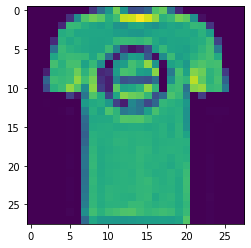

In [5]:
import matplotlib.pyplot as plt
plt.imshow(sample)

In [6]:
sample = sample.reshape(*(28, 28, 1))

In [8]:
print("There are", len(images), "images in the dataset.")

There are 2000 images in the dataset.


In [9]:
THRESHOLD = 0

In [10]:
sample = tf.image.resize(sample, (4,4)).numpy()

2023-01-28 19:00:16.210301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-28 19:00:16.210338: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-28 19:00:16.210357: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-max-2emcui-40gmail-2ecom): /proc/driver/nvidia/version does not exist
2023-01-28 19:00:16.210881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


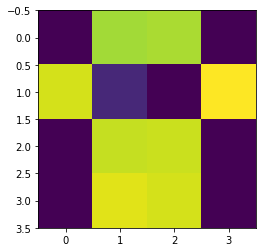

In [12]:
plt.imshow(sample)

In [27]:
for i in range(len(sample)):
    for j in range(len(sample[i])):
        sample[i][j] = [1.0 if sample[i][j] > THRESHOLD else 0.0]
        

In [28]:
sample

array([[[0.],
        [1.],
        [1.],
        [0.]],

       [[1.],
        [1.],
        [0.],
        [1.]],

       [[0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [1.],
        [1.],
        [0.]]], dtype=float32)

In [29]:
def tocircuit(image):
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4,4)
    circuit = cirq.Circuit()
    for i, val in enumerate(values):
        if val: circuit.append(cirq.X(qubits[i]))
    return circuit

In [30]:
cirquit = tocircuit(sample)

In [39]:
from cirq.contrib.svg import SVGCircuit

In [36]:
def encode(image):
    THRESHOLD = 0.0
    image = image.reshape(*(28, 28, 1))
    image = tf.image.resize(image, (4,4)).numpy()
    for i in range(len(image)):
        for j in range(len(image[i])):
            image[i][j] = [1.0 if image[i][j] > THRESHOLD else 0.0]
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4,4)
    circuit = cirq.Circuit()
    for i, val in enumerate(values):
        if val: circuit.append(cirq.X(qubits[i]))
    return circuit

In [37]:
enc_cirq = encode(images[1])

In [40]:
def simulate(circuit: cirq.Circuit) -> dict:
    """This funcion simulate a cirq circuit (without measurement) and output results in the format of histogram.
    """
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    
    state_vector=result.final_state_vector
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram

In [41]:
hist = simulate(enc_cirq)

In [42]:
hist

{16383: 1.0}